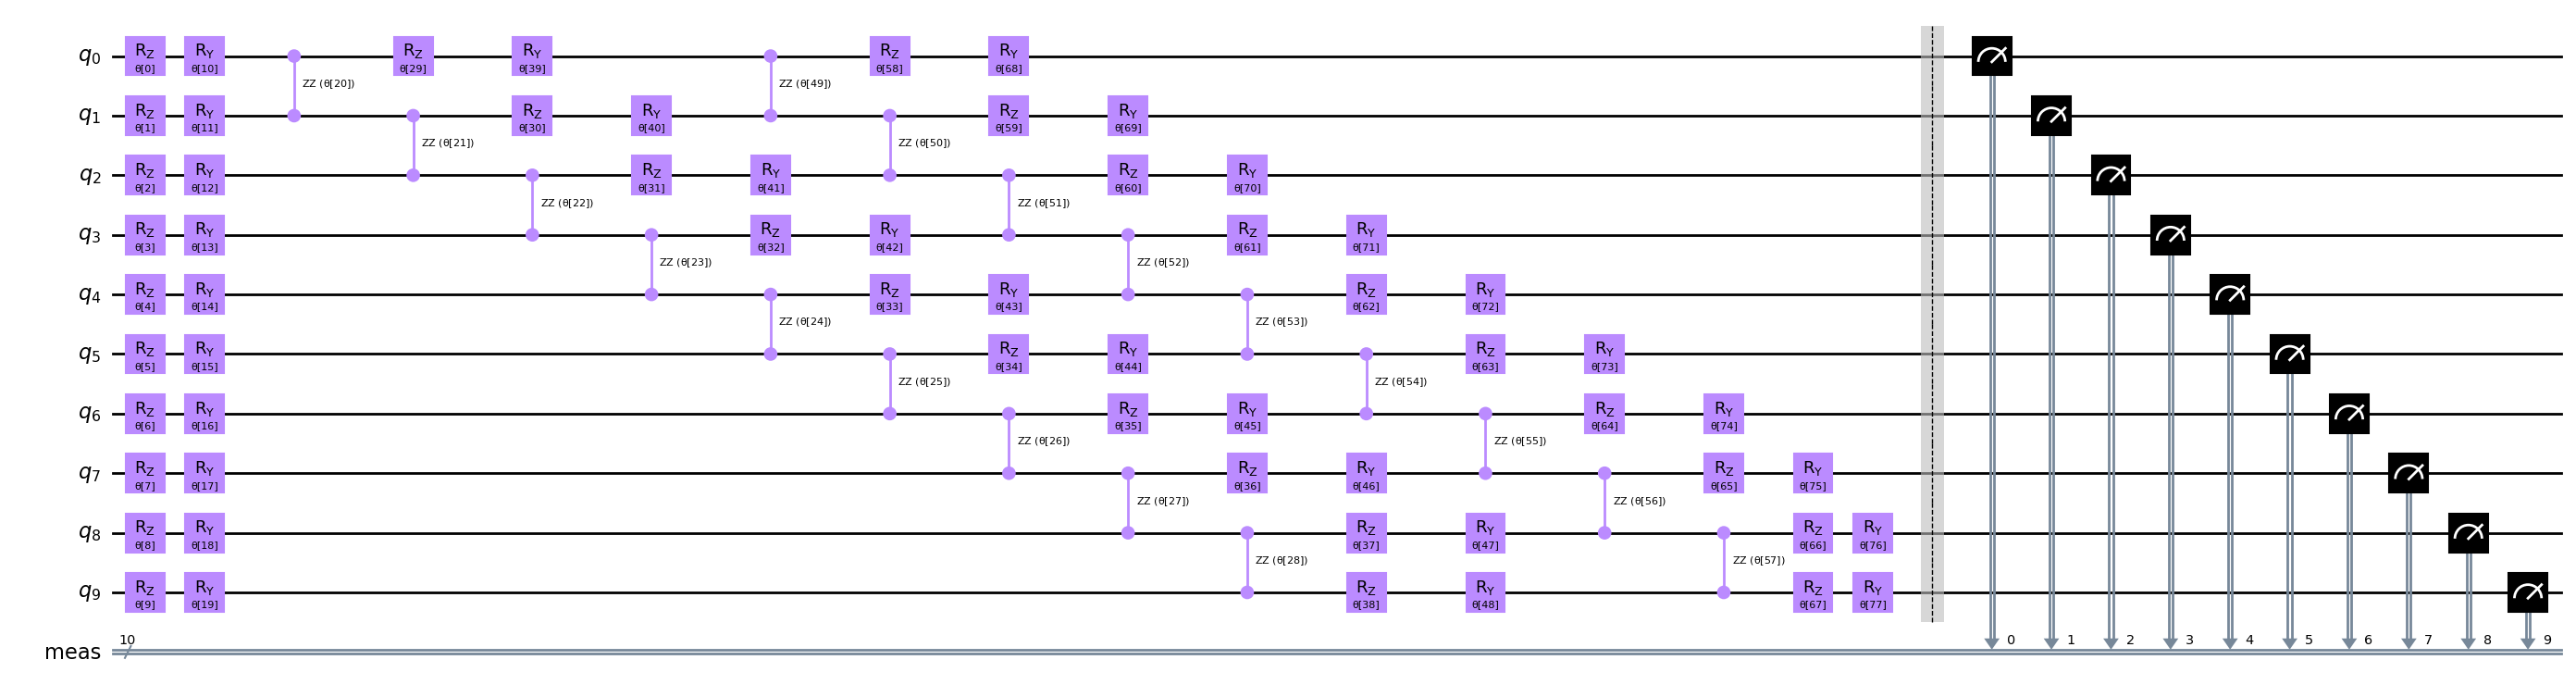

In [5]:
import numpy as np
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import TwoLocal, QuantumVolume
from qiskit_aer import AerSimulator

from qvm.runtime.runner import expval_from_counts, sample_fragments
from qvm.runtime.runners import SimRunner
from qvm.runtime.virtualizer import build_tensornetwork, build_dummy_tensornetwork
from qvm.cutter.girvan_newman import GirvanNewmanCutter
from qvm.virtual_circuit import VirtualCircuit


circuit = TwoLocal(
    10,
    rotation_blocks=["rz", "ry"],
    entanglement_blocks="rzz",
    entanglement="linear",
    reps=2,
).decompose()
circuit.measure_all()


params = {param: np.random.randn() / 2 for param in circuit.parameters}

circuit.draw("mpl", fold=-1)

<class 'qvm.cutter._graphs.TNGraph'>
<class 'qvm.cutter._graphs.TNGraph'>


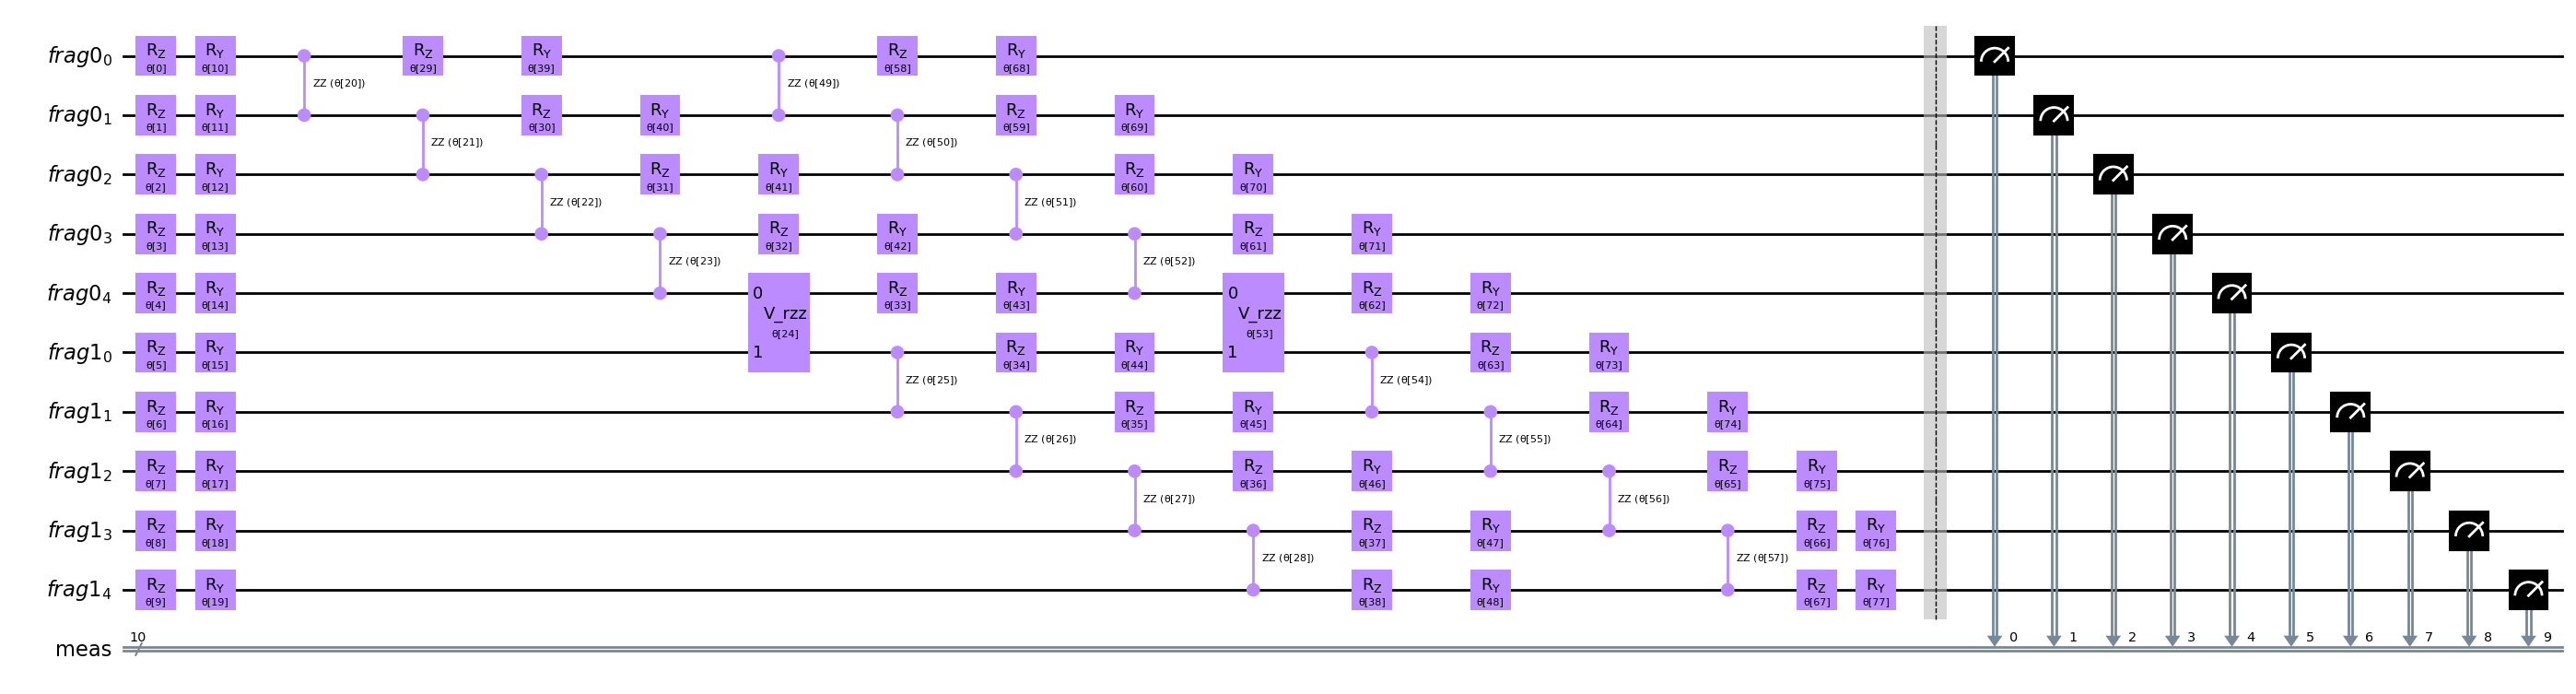

In [6]:
cut_circuit = GirvanNewmanCutter(50).run(circuit)
cut_circuit.draw("mpl", fold=-1)

50


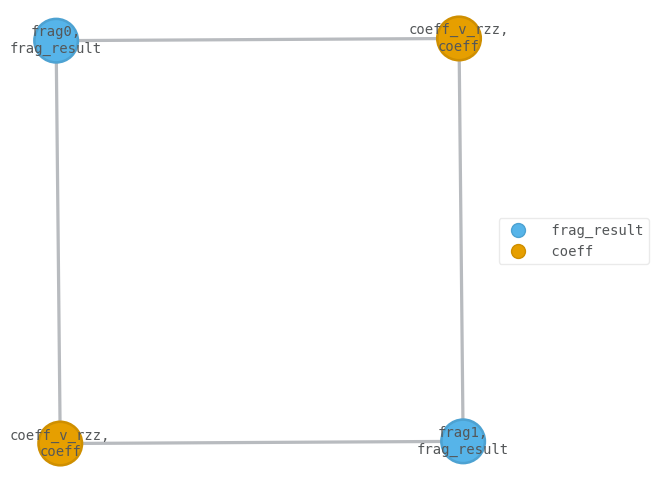

275.0


In [7]:
cut_circuit = cut_circuit.assign_parameters(params)

virtual_circuit = VirtualCircuit(cut_circuit)
print(virtual_circuit.num_instantiations())

tn = build_dummy_tensornetwork(virtual_circuit)
tn.draw(color=["frag_result", "coeff"])
print(tn.contraction_cost(optimize="auto"))

In [8]:
results = sample_fragments(virtual_circuit, SimRunner(), shots=100000)
tn = build_tensornetwork(virtual_circuit, results)

In [9]:
result = tn.contract(all, optimize="auto-hq")
result

0.006359121296554804

In [10]:
circuit = circuit.assign_parameters(params)

counts = AerSimulator().run(circuit, shots=100000).result().get_counts()
print(abs(result - expval_from_counts(counts)))

0.0022991212965549537
